## 5개 부문별 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np


In [2]:
final = pd.read_csv("./data/final.csv")
final_best = pd.read_csv("./data/final_best.csv")
final_direct = pd.read_csv("./data/final_direct.csv")
final_write = pd.read_csv("./data/final_write.csv")
final_actor = pd.read_csv("./data/final_actor.csv")
final_actress = pd.read_csv("./data/final_actress.csv")


In [3]:
df = pd.get_dummies(final['Date'])
final = pd.concat([final,pd.get_dummies(final['Date'])], axis=1)

df = pd.get_dummies(final_best['Date'])
final_best = pd.concat([final_best,pd.get_dummies(final_best['Date'])], axis=1)

df = pd.get_dummies(final_direct['Date'])
final_direct = pd.concat([final_direct,pd.get_dummies(final_direct['Date'])], axis=1)

df = pd.get_dummies(final_write['Date'])
final_write = pd.concat([final_write,pd.get_dummies(final_write['Date'])], axis=1)

df = pd.get_dummies(final_actor['Date'])
final_actor = pd.concat([final_actor,pd.get_dummies(final_actor['Date'])], axis=1)

df = pd.get_dummies(final_actress['Date'])
final_actress = pd.concat([final_actress,pd.get_dummies(final_actress['Date'])], axis=1)

### matplot에 한글 패치 

In [5]:
import matplotlib as mpl
import os
from matplotlib import font_manager as fm, rcParams
%matplotlib inline

fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows, NanumGothic.ttf 설치 필요(네이버 무료 폰트)
font_name = fm.FontProperties(fname=font_location).get_name()
mpl.rc('font', family=font_name)

## 부문 별 노미네이션 영화 수 

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


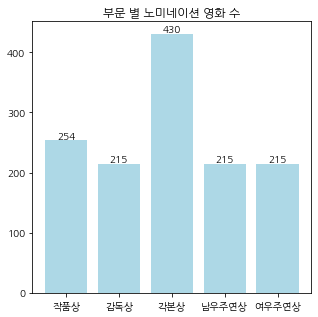

In [165]:
x = ['작품상','감독상','각본상','남우주연상','여우주연상']
y = [ final_best.shape[0], final_direct.shape[0], final_write.shape[0], final_actor.shape[0], final_actress.shape[0]]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.bar(x,y, color = 'lightblue')
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate(p.get_height(), (left+width/2, height*1.01), ha='center')
ax.set_title('부문 별 노미네이션 영화 수')


plt.show()

각본상은 이름을 'WRITING'으로 통일하는 과정에서 데이터의 수가 늘었다.

## 월별 수상작과 노미네이션 영화 수 

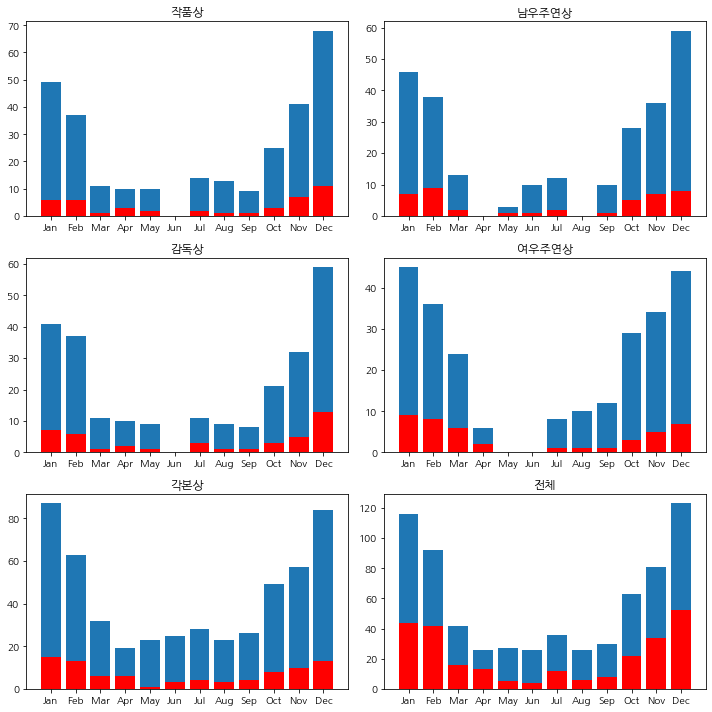

In [9]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

# [0,0] 작품상 
best = pd.DataFrame(final_best["Date"].value_counts())
best = best.reindex(["Jan","Feb","Mar","Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).rename_axis('month')
best["win"] = pd.DataFrame(final_best['Date'][final_best['win']==1].value_counts())
p1 = axs[0,0].bar(best.index, best["win"], color='red')
p2 = axs[0,0].bar(best.index, best["Date"], bottom =best['win'])
axs[0,0].set_title('작품상')



# [1,0] 감독상
direct = pd.DataFrame(final_direct["Date"].value_counts())
direct = direct.reindex(["Jan","Feb","Mar","Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).rename_axis('month')
direct["win"] = pd.DataFrame(final_direct['Date'][final_direct['win']==1].value_counts())
p1 = axs[1,0].bar(direct.index, direct["win"], color='red')
p2 = axs[1,0].bar(direct.index, direct["Date"], bottom =direct['win'])
axs[1,0].set_title('감독상')

    

# [0,1] 남우주연상
actor = pd.DataFrame(final_actor["Date"].value_counts())
actor = actor.reindex(["Jan","Feb","Mar","Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).rename_axis('month')
actor["win"] = pd.DataFrame(final_actor['Date'][final_actor['win']==1].value_counts())
p1 = axs[0,1].bar(actor.index, actor["win"], color='red')
p2 = axs[0,1].bar(actor.index, actor["Date"], bottom =actor['win'])
axs[0,1].set_title('남우주연상')

    

# [1,1] 여우주연상
actress = pd.DataFrame(final_actress["Date"].value_counts())
actress = actress.reindex(["Jan","Feb","Mar","Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).rename_axis('month')
actress["win"] = pd.DataFrame(final_actress['Date'][final_actress['win']==1].value_counts())
p1= axs[1,1].bar(actress.index, actress["win"], color='red')
p2 = axs[1,1].bar(actress.index, actress["Date"], bottom =actress['win'])
axs[1,1].set_title('여우주연상')

    

# [2,0] 각본상
write = pd.DataFrame(final_write["Date"].value_counts())
write = write.reindex(["Jan","Feb","Mar","Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).rename_axis('month')
write["win"] = pd.DataFrame(final_write['Date'][final_write['win']==1].value_counts())
p1 = axs[2,0].bar(write.index, write["win"], color='red')
p2 = axs[2,0].bar(write.index, write["Date"], bottom =write['win'])
axs[2,0].set_title('각본상')

# [2,1] 전체
total = pd.DataFrame(final["Date"].value_counts())
total = write.reindex(["Jan","Feb","Mar","Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).rename_axis('month')
total["win"] = pd.DataFrame(final['Date'][final['win']==1].value_counts())
p1 = axs[2,1].bar(total.index, total["win"], color='red')
p2 = axs[2,1].bar(total.index, total["Date"], bottom =total['win'])
axs[2,1].set_title('전체')
    

fig.tight_layout()

plt.show()

노미네이션된 작품들과 수상된 작품들의 월별 분포를 그린 barplot이다.   
전 부문 겨울(10월-2월)에 개봉된 작품들이 많고, 그에 비례하여 수상하는 것으로 보인다. 

## 장르별 수상작과 노미네이션 영화 수 

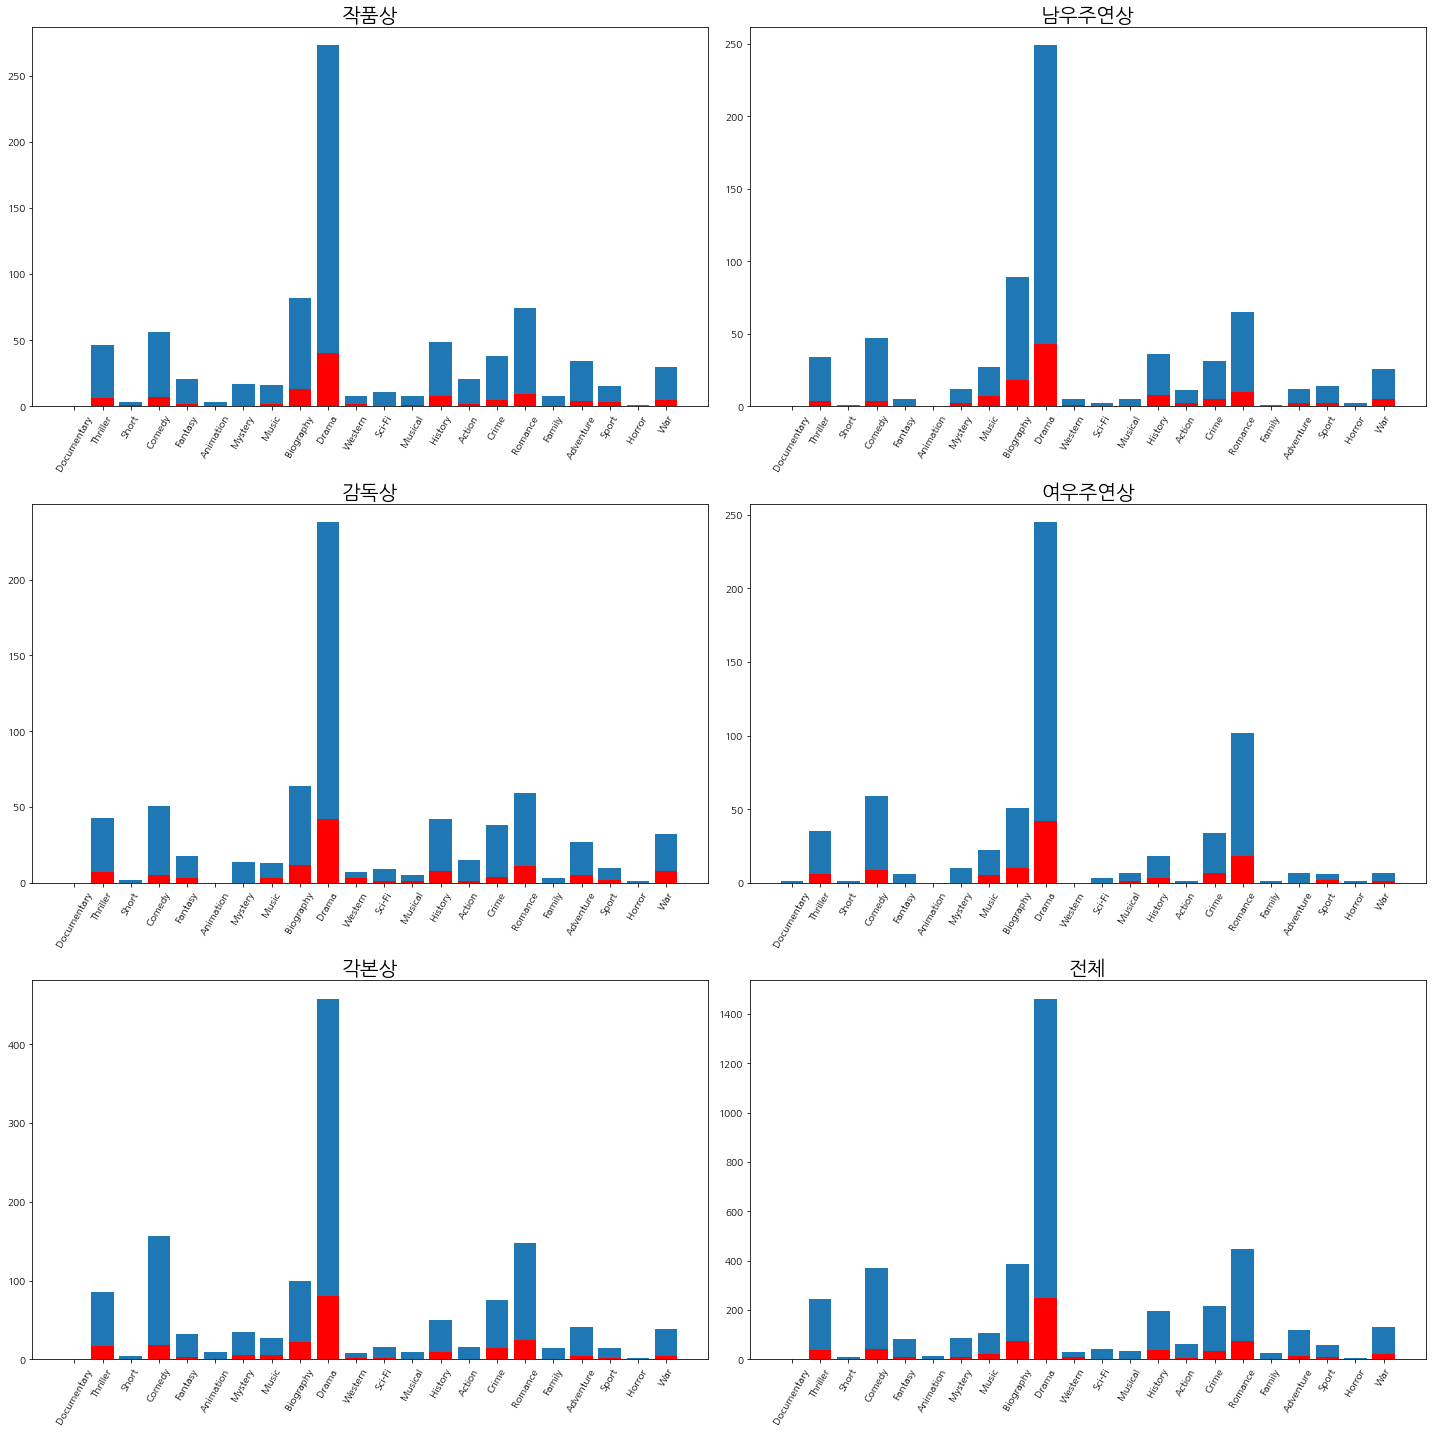

In [12]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20,20))

# [0,0] 작품상 
best1 = pd.DataFrame(final_best.iloc[:,16:38].sum())
best1["win"] = final_best[final_best['win']==1].iloc[:,16:38].sum()
p1 = axs[0,0].bar(best1.index, best1["win"], color='red')
p2 = axs[0,0].bar(best1.index, best1[0], bottom =best1['win'])
axs[0,0].set_title('작품상', fontsize = 20)



# [1,0] 감독상
direct1 = pd.DataFrame(final_direct.iloc[:,16:38].sum())
direct1["win"] = final_direct[final_direct['win']==1].iloc[:,16:38].sum()
p1 = axs[1,0].bar(direct1.index, direct1["win"], color='red')
p2 = axs[1,0].bar(direct1.index, direct1[0], bottom =direct1['win'])
axs[1,0].set_title('감독상', fontsize = 20)

    

# [0,1] 남우주연상
actor1 = pd.DataFrame(final_actor.iloc[:,16:38].sum())
actor1["win"] = final_actor[final_actor['win']==1].iloc[:,16:38].sum()
p1 = axs[0,1].bar(actor1.index, actor1["win"], color='red')
p2 = axs[0,1].bar(actor1.index, actor1[0], bottom =actor1['win'])
axs[0,1].set_title('남우주연상', fontsize = 20)

    

# [1,1] 여우주연상
actress1 = pd.DataFrame(final_actress.iloc[:,16:38].sum())
actress1["win"] = final_actress[final_actress['win']==1].iloc[:,16:38].sum()
p1 = axs[1,1].bar(actress1.index, actress1["win"], color='red')
p2 = axs[1,1].bar(actress1.index, actress1[0], bottom =actress1['win'])
axs[1,1].set_title('여우주연상', fontsize = 20)

    

# [2,0] 각본상
write1 = pd.DataFrame(final_write.iloc[:,16:38].sum())
write1["win"] = final_write[final_write['win']==1].iloc[:,16:38].sum()
p1 = axs[2,0].bar(write1.index, write1["win"], color='red')
p2 = axs[2,0].bar(write1.index, write1[0], bottom =write1['win'])
axs[2,0].set_title('각본상', fontsize = 20)


# [2,1] 전체
total1 = pd.DataFrame(final.iloc[:,16:38].sum())
total1["win"] = final[final['win']==1].iloc[:,16:38].sum()
p1 = axs[2,1].bar(total1.index, total1["win"], color='red')
p2 = axs[2,1].bar(total1.index, total1[0], bottom =total1['win'])
axs[2,1].set_title('전체', fontsize = 20)

for ax in fig.axes:
    mpl.pyplot.sca(ax)
    plt.xticks(rotation=60)

fig.tight_layout()

plt.show()

* 거의 모든 영화가 Drama 장르를 포함하고 있다.  
* 작품상과 감독상에서 Western 장르를 보면 노미네이션 된 작품 중 수상의 비율이 절반에 가까운 것을 볼 수 있다.  
   Western장르가 노미네이트 되면 수상 확률이 높다.  
* Mystery 장르는 작품상과, 감독상을 수상한 횟수가 없다. 하지만 각본상 수상은 노미네이트 된 횟수에 비해 많다.  
* Documentery 장르는 전부문에서 노미네이트 된적이 없다. 
* 몇몇 장르(Animation, Short, Horror, Family) 노미네이트 되어도 수상한 이력이 없다. 
* 감독상에서 War장르는 다른 부문에서 비해 수상 횟수가 많다. 감독상에 War장르의 영화가 노미네이트 되면 수상 확률이 높다. 
* 여우주연상에서 여성이 거의 출연하지 않는 장르(Western, War)는 노미네이션 횟수, 수상 횟수가 적다.
* 여우주연상은 Comedy,Romance 장르에서 많이 노미네이션되고, 수상된다.
* 전 부문에서 History장르는 노미네이션 횟수 대비 수상 횟수가 많다.

## 부문별 수상과 상관도가 높은 feature 확인 _Heatmap

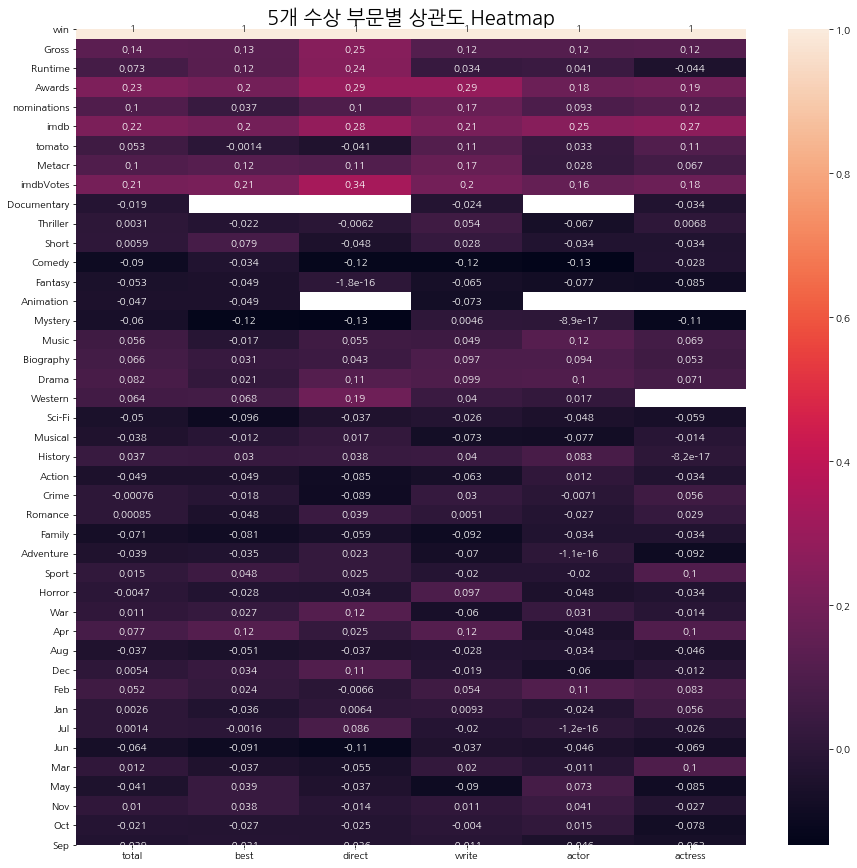

In [84]:
pd.options.display.float_format = '{:.5f}'.format # scientific notation to decimal number in dataframe
df_corr = pd.DataFrame()
df_corr['total'] =final.corr()[['win']][3:]['win']
df_corr['best'] = final_best.corr()[['win']]['win']
df_corr['direct'] = final_direct.corr()[['win']]['win']
df_corr['write'] = final_write.corr()[['win']]['win']
df_corr['actor'] = final_actor.corr()[['win']]['win']
df_corr['actress'] = final_actress.corr()[['win']]['win']

plt.figure(figsize=(15, 15))
ax = sns.heatmap(df_corr, annot=True)

plt.title('5개 수상 부문별 상관도 Heatmap', fontsize=20)

plt.show() 


* 전부문에서 강한 상관관계를 가진 feature는 없다. 
* 각 부문별로 상관관계가 높은 feature는 다 다르다. 
* 전부문에서 Awards, imdb, imdbVotes 의 상관관계가 상대적으로 높다. 
* 감독상은 대중이 평가하는 feature들의 상관관계가 높다. 이 피쳐들로 예측하면 (Gross, imdb, Awards, imdbVotes) 좋다. 
* 감독상과 westurn 장르의 상관도가 높다. 


## 부문별 feature에 따른 데이터 분포_boxplot

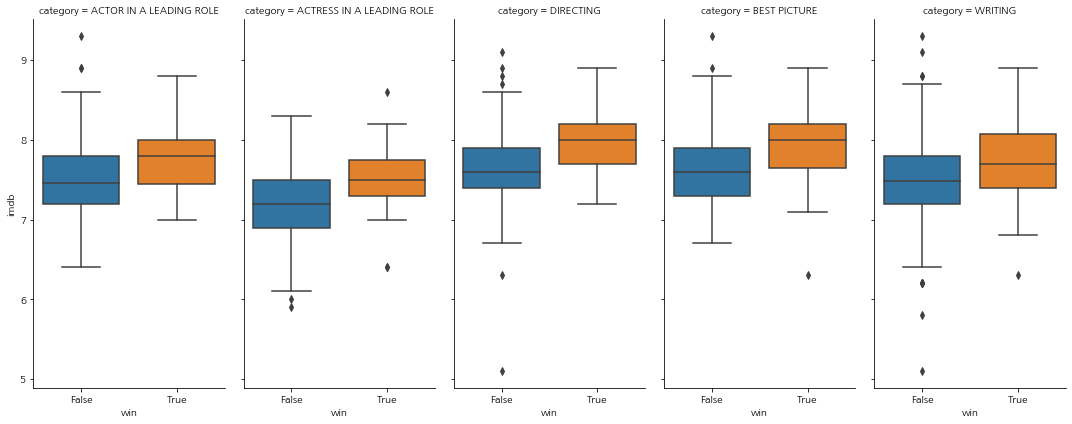

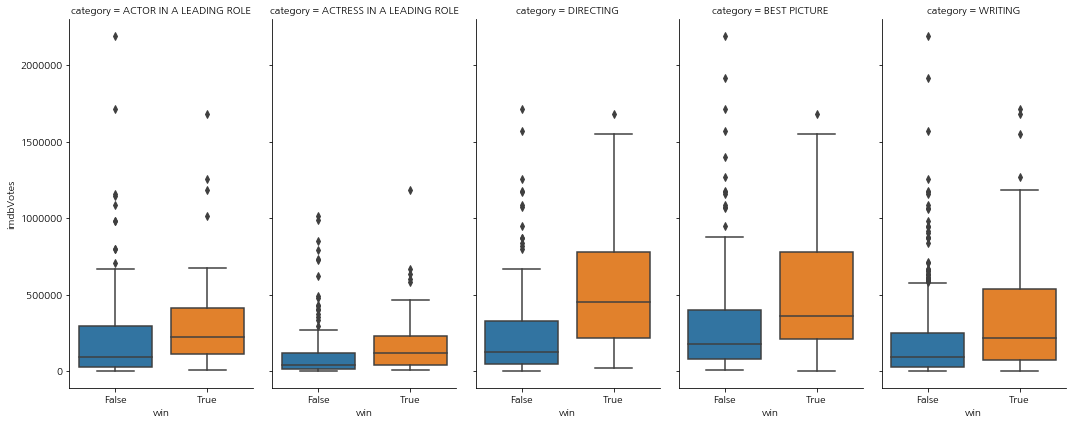

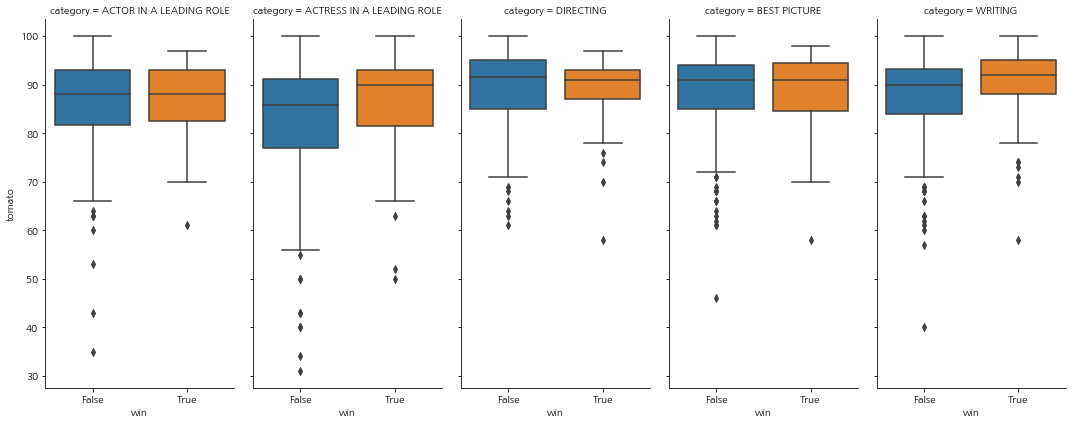

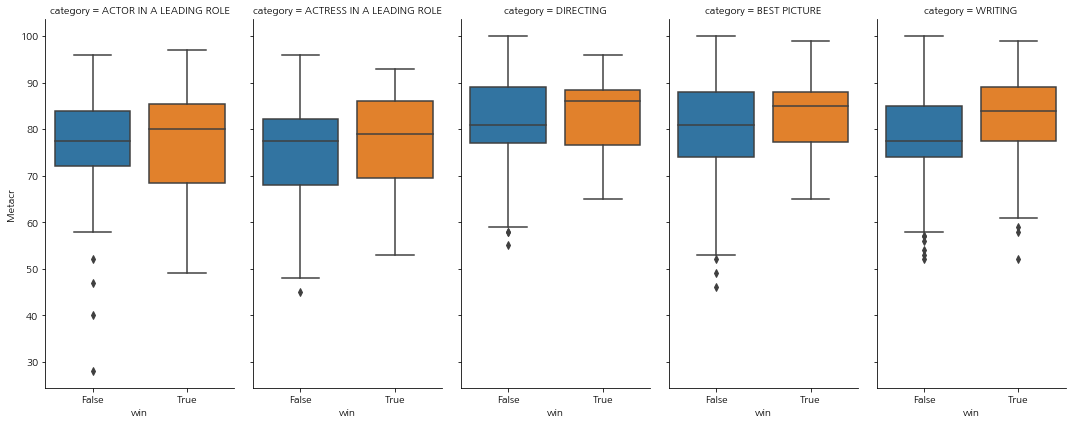

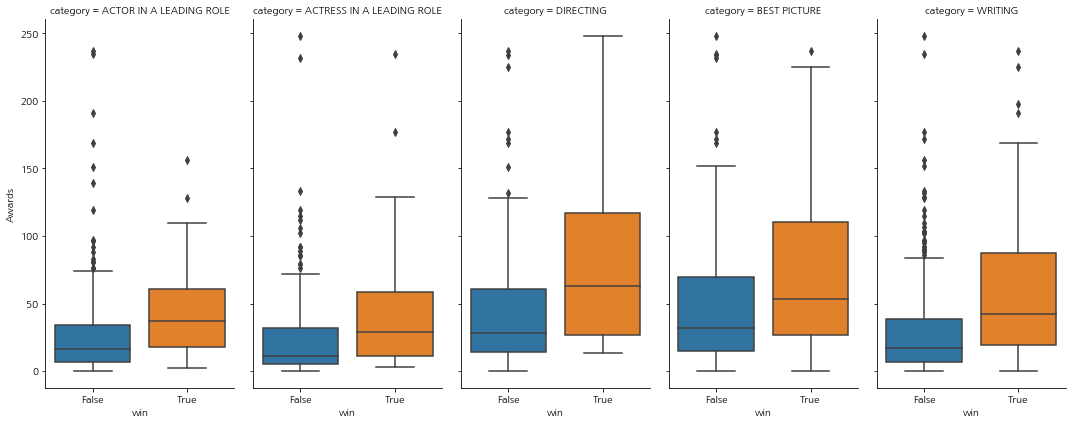

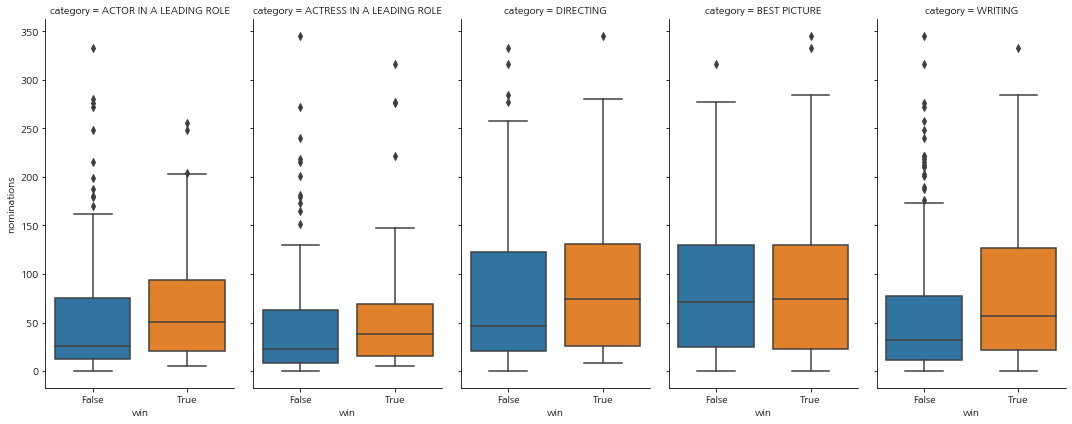

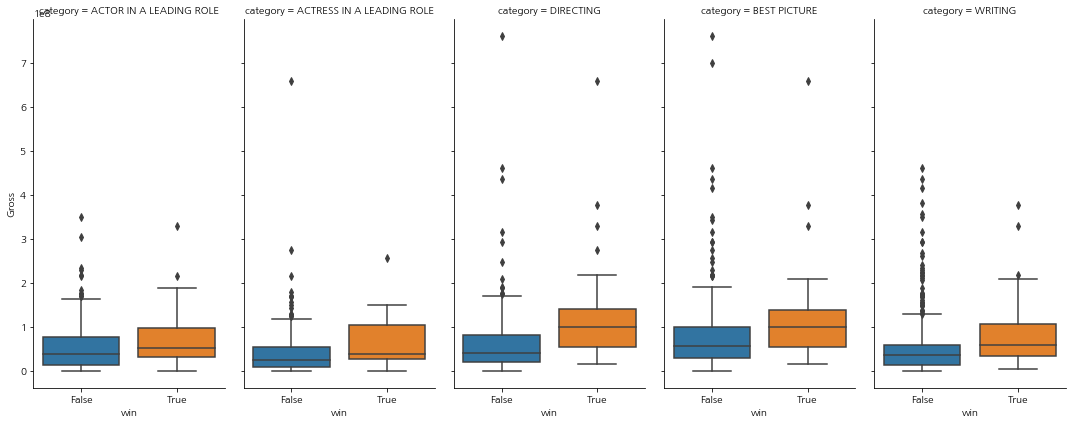

In [36]:
# imdb
g1 = sns.catplot(x="win", y="imdb",
                col="category",
                data=final, kind="box",
                    height=6, aspect=.5)

# imdbVotes
g2 = sns.catplot(x="win", y="imdbVotes",
                col="category",
                data=final, kind="box",
                 height=6, aspect=.5)

g3 = sns.catplot(x="win", y="tomato",
                col="category",
                data=final, kind="box",
                 height=6, aspect=.5)

#Metacr
g4 = sns.catplot(x="win", y="Metacr",
                col="category",
                data=final, kind="box",
                 height=6, aspect=.5)

# Awards
g5 = sns.catplot(x="win", y="Awards",
                col="category",
                data=final, kind="box",
                 height=6, aspect=.5)

# nominations
g6 = sns.catplot(x="win", y="nominations",
                col="category",
                data=final, kind="box",
                 height=6, aspect=.5)

# Gross
g7 = sns.catplot(x="win", y="Gross",
                col="category",
                data=final, kind="box",
                 height=6, aspect=.5)

* 부문별 feature에 따른 데이터의 분포를 boxplot으로 확인한 결과 수상한 작품들의 박스가 수상하지 않을 것 보다 높이 위치한다는 것을 볼 수 있다. 대체적으로 평가지표가 높으면 수상 할 확률이 높다는 것을 의미한다.   
* Heatmap에서 확인했던 상관도가 높은 imdb, imdbVotes, Awards에서 boxplot을 볼 때, 수상한 경우 IQR 범위가 넓고 박스가 높이 위치한 것을 볼 수 있다.
* 상관도가 낮았던 Rotten tomato에서 가져온 데이터인 tomato meter, rotten tomato meter의 값은 수상 여부에 따른 박스의 크기나 높이 차이가 상대적으로 없다. 
* imdb는 아웃라이어가 위에, tomato meter는 밑에 생기는 것을 보아, imdb 사이트는 대중들이 대체적으로 좋은 쪽으로 평가하고, rotten tomato 사이트는 극적으로 안좋게 평가하는 경향이 있다는 것을 알 수 있다. 
* 수상하지 못한 데이터들의 아웃라이어가 많은데, 이는 데이터 불균형으로 수상하지 않은 작품의 수가 수상한 갯수 보다 많아서 일 수 도 있다. 또한 아웃라이어들이 위쪽으로 있는 경우, 평점이 좋거나 흥행이 되고, 대중의 관심이 많다고 해도 꼭 수상하는 것이 아니라는 것을 알려준다. 

## 시상식 년도별, 부문별 imdb 데이터 분포 

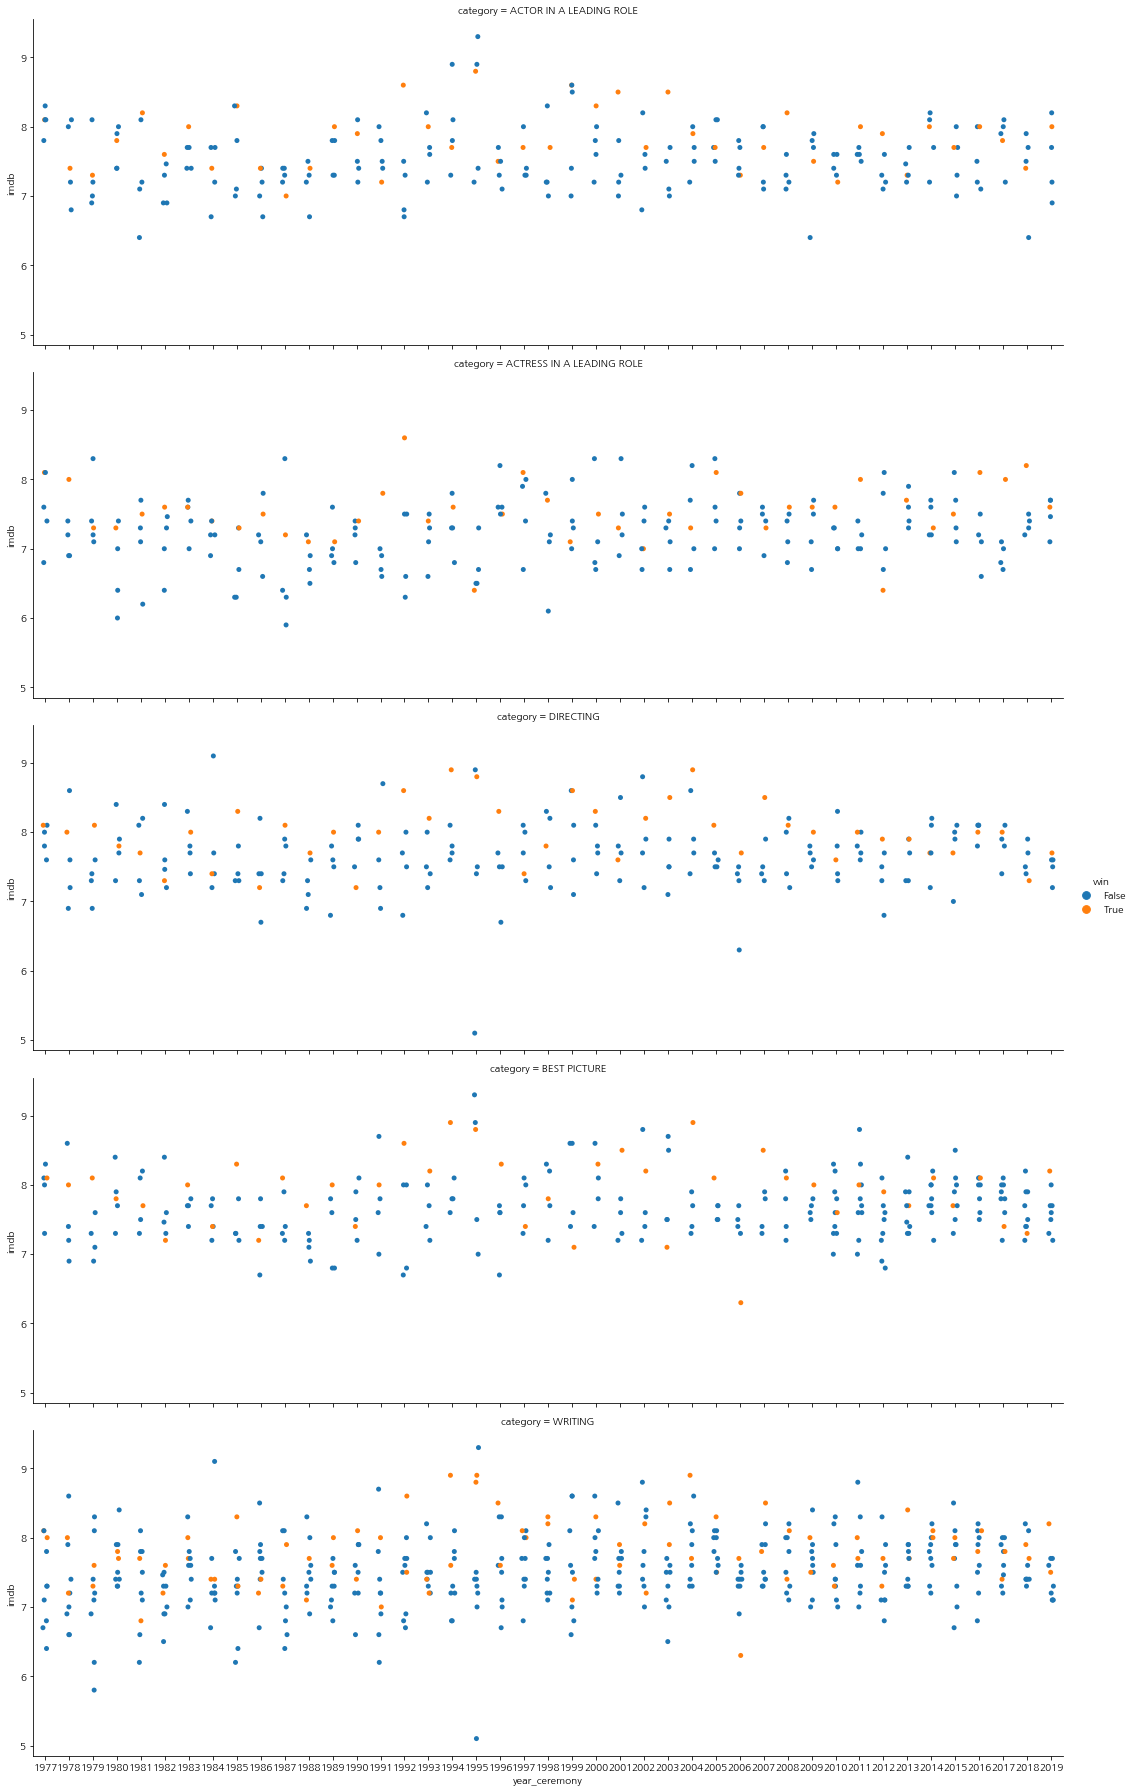

In [67]:

g = sns.catplot(x="year_ceremony", y="imdb", hue="win",
                row = "category" , data=final,
                height=5, aspect=3)


* 상관도가 높았던 imdb, imdbVotes, Awards만 살펴보기로 하자.
* imdb.com 은 1990년에 생긴 영화 전문 사이트이다. 
* 1990년도 이전의 기록은 시상식 이후에 작성된 것이므로, 시상 여부가 점수에 영향을 미처 높은 점수를 받았을 수 있다.
* 그 해에 imdb 점수가 높은 작품이 꼭 상을 타는 것은 아니다. 

## 시상식 년도별, 부문별 imdbVotes 데이터 분포 

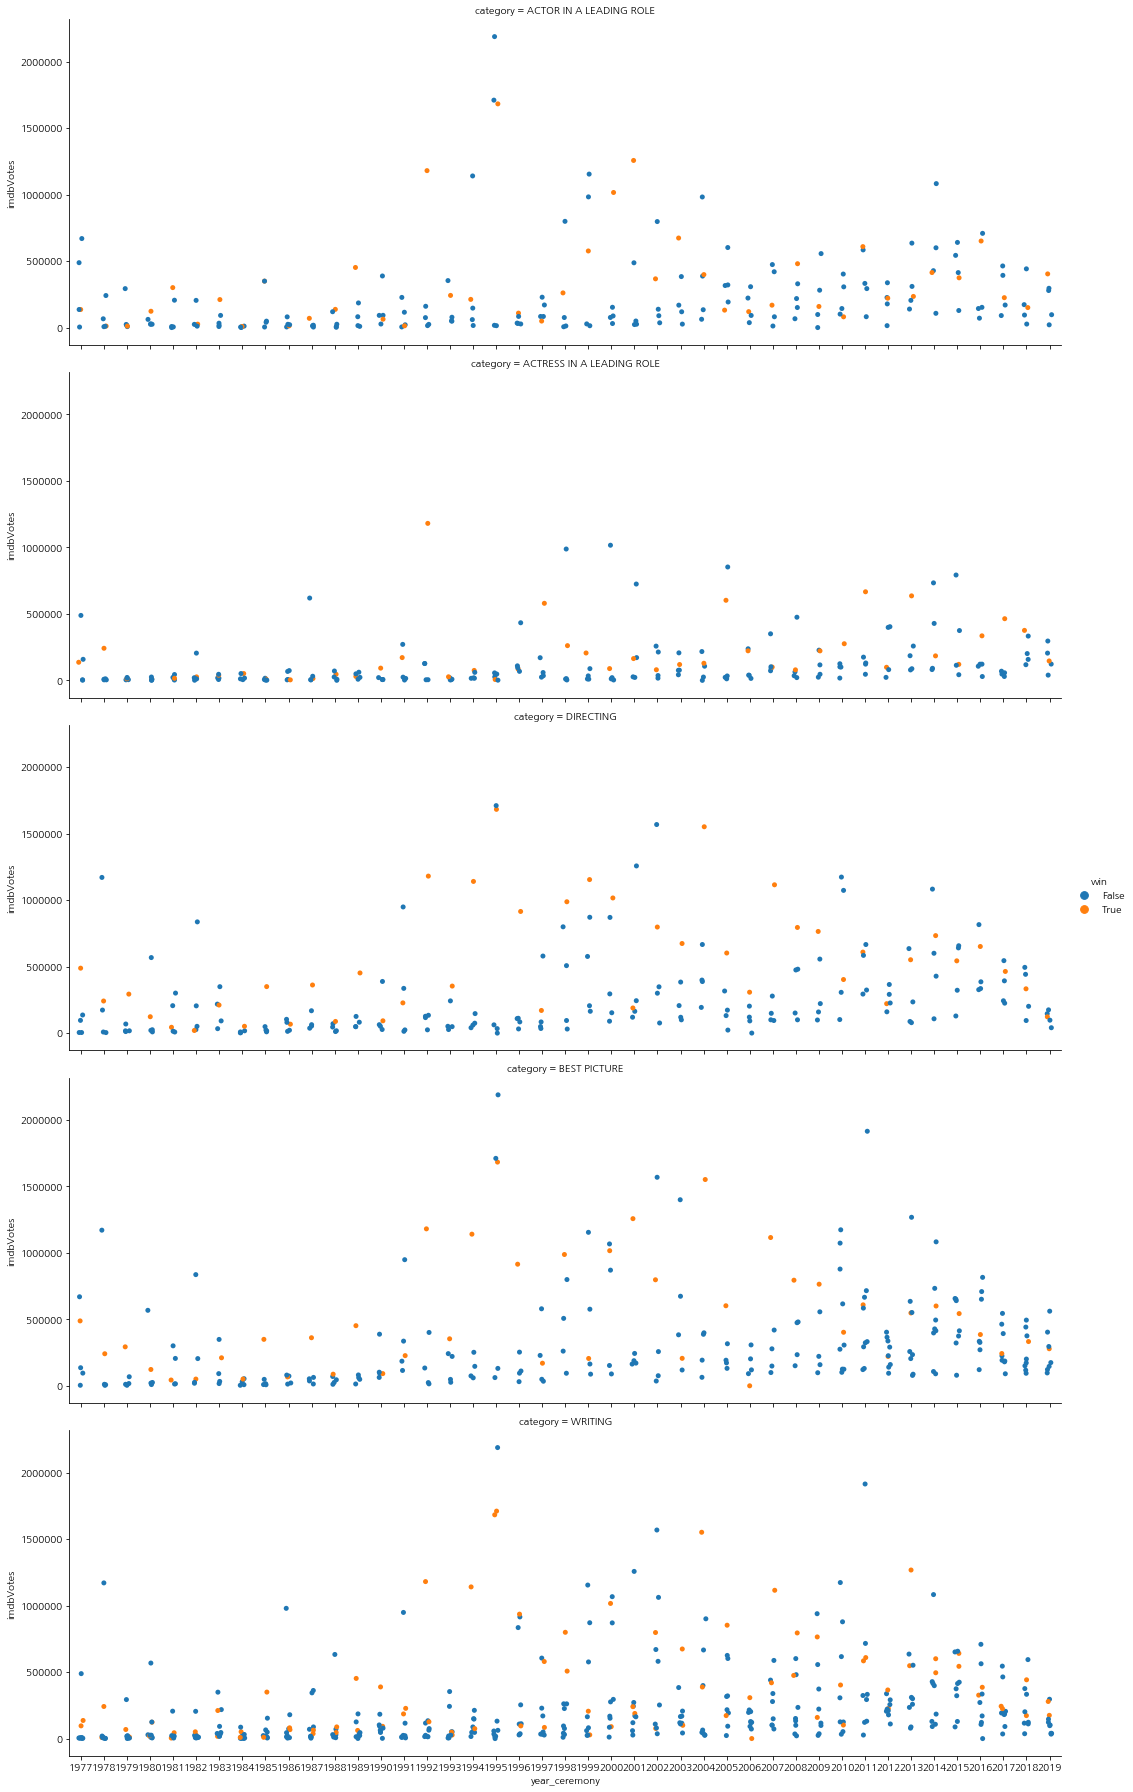

In [68]:

g = sns.catplot(x="year_ceremony", y="imdbVotes", hue="win",
                row = "category" , data=final,
                height=5, aspect=3)


* 1990년 이후로 투표가 눈에 띄게 많은 작품이 생겼다. 사이트가 생긴 후 사람들이 작품 투표에 참여를 많이 했다. 
* imdbVotes 점수가 높은 작품이 수상을 하나 꼭 그렇다고 말할 수 없다. 

## 시상식 년도별, 부문별 Awards 데이터 분포 

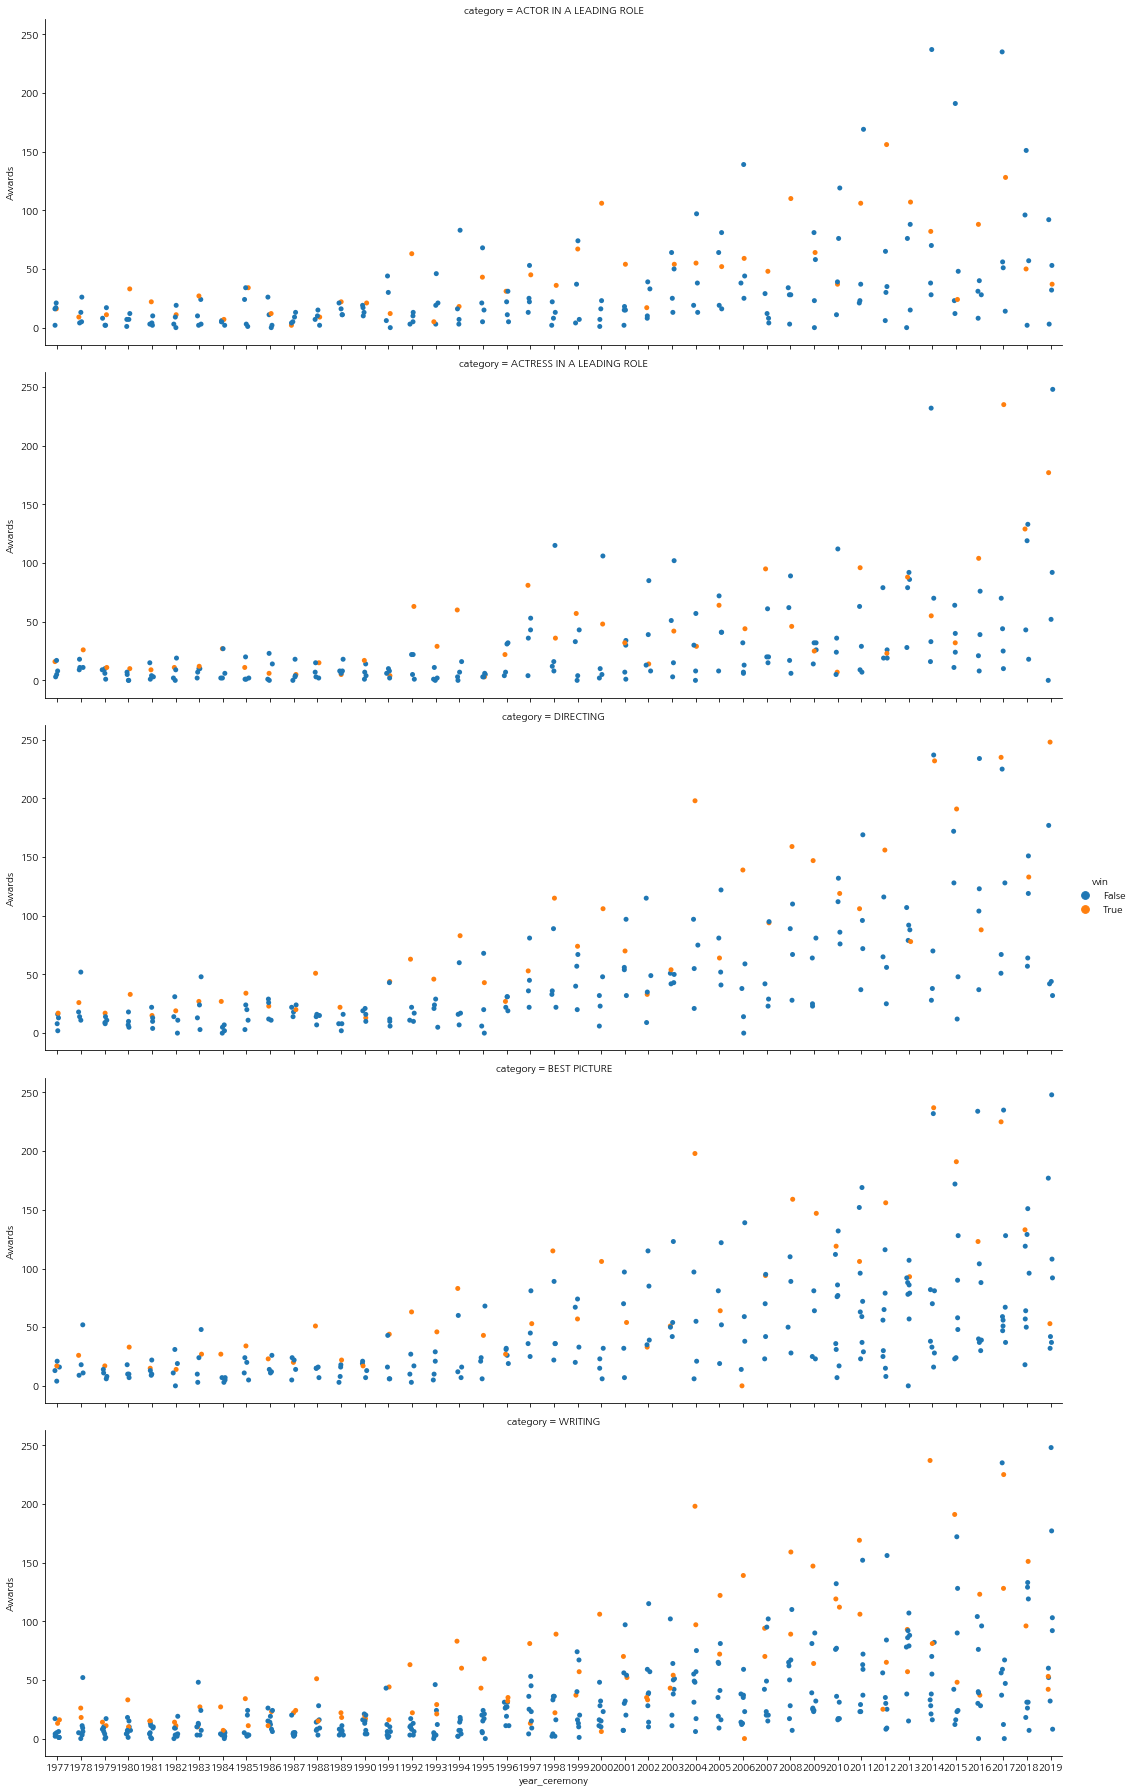

In [69]:

g = sns.catplot(x="year_ceremony", y="Awards", hue="win",
                row = "category" , data=final,
                height=5, aspect=3)


* Awards의 수는 하나의 영화가 수상한 상의 갯수이다. 어떤 항목으로 수상한지 모른다. 
* 90년대 이후 영화제에서 수상한 상의 갯수가 늘어나는 걸로 보아, 현대에 영화제가 늘어났고, 수상 부분이 늘어났을 것으로 추정된다. 
* 수상 이력이 많다고 해서 수상을 하는 것은 아니다.

## pairplot을 이용하여 feature들간의 상관 관계 확인

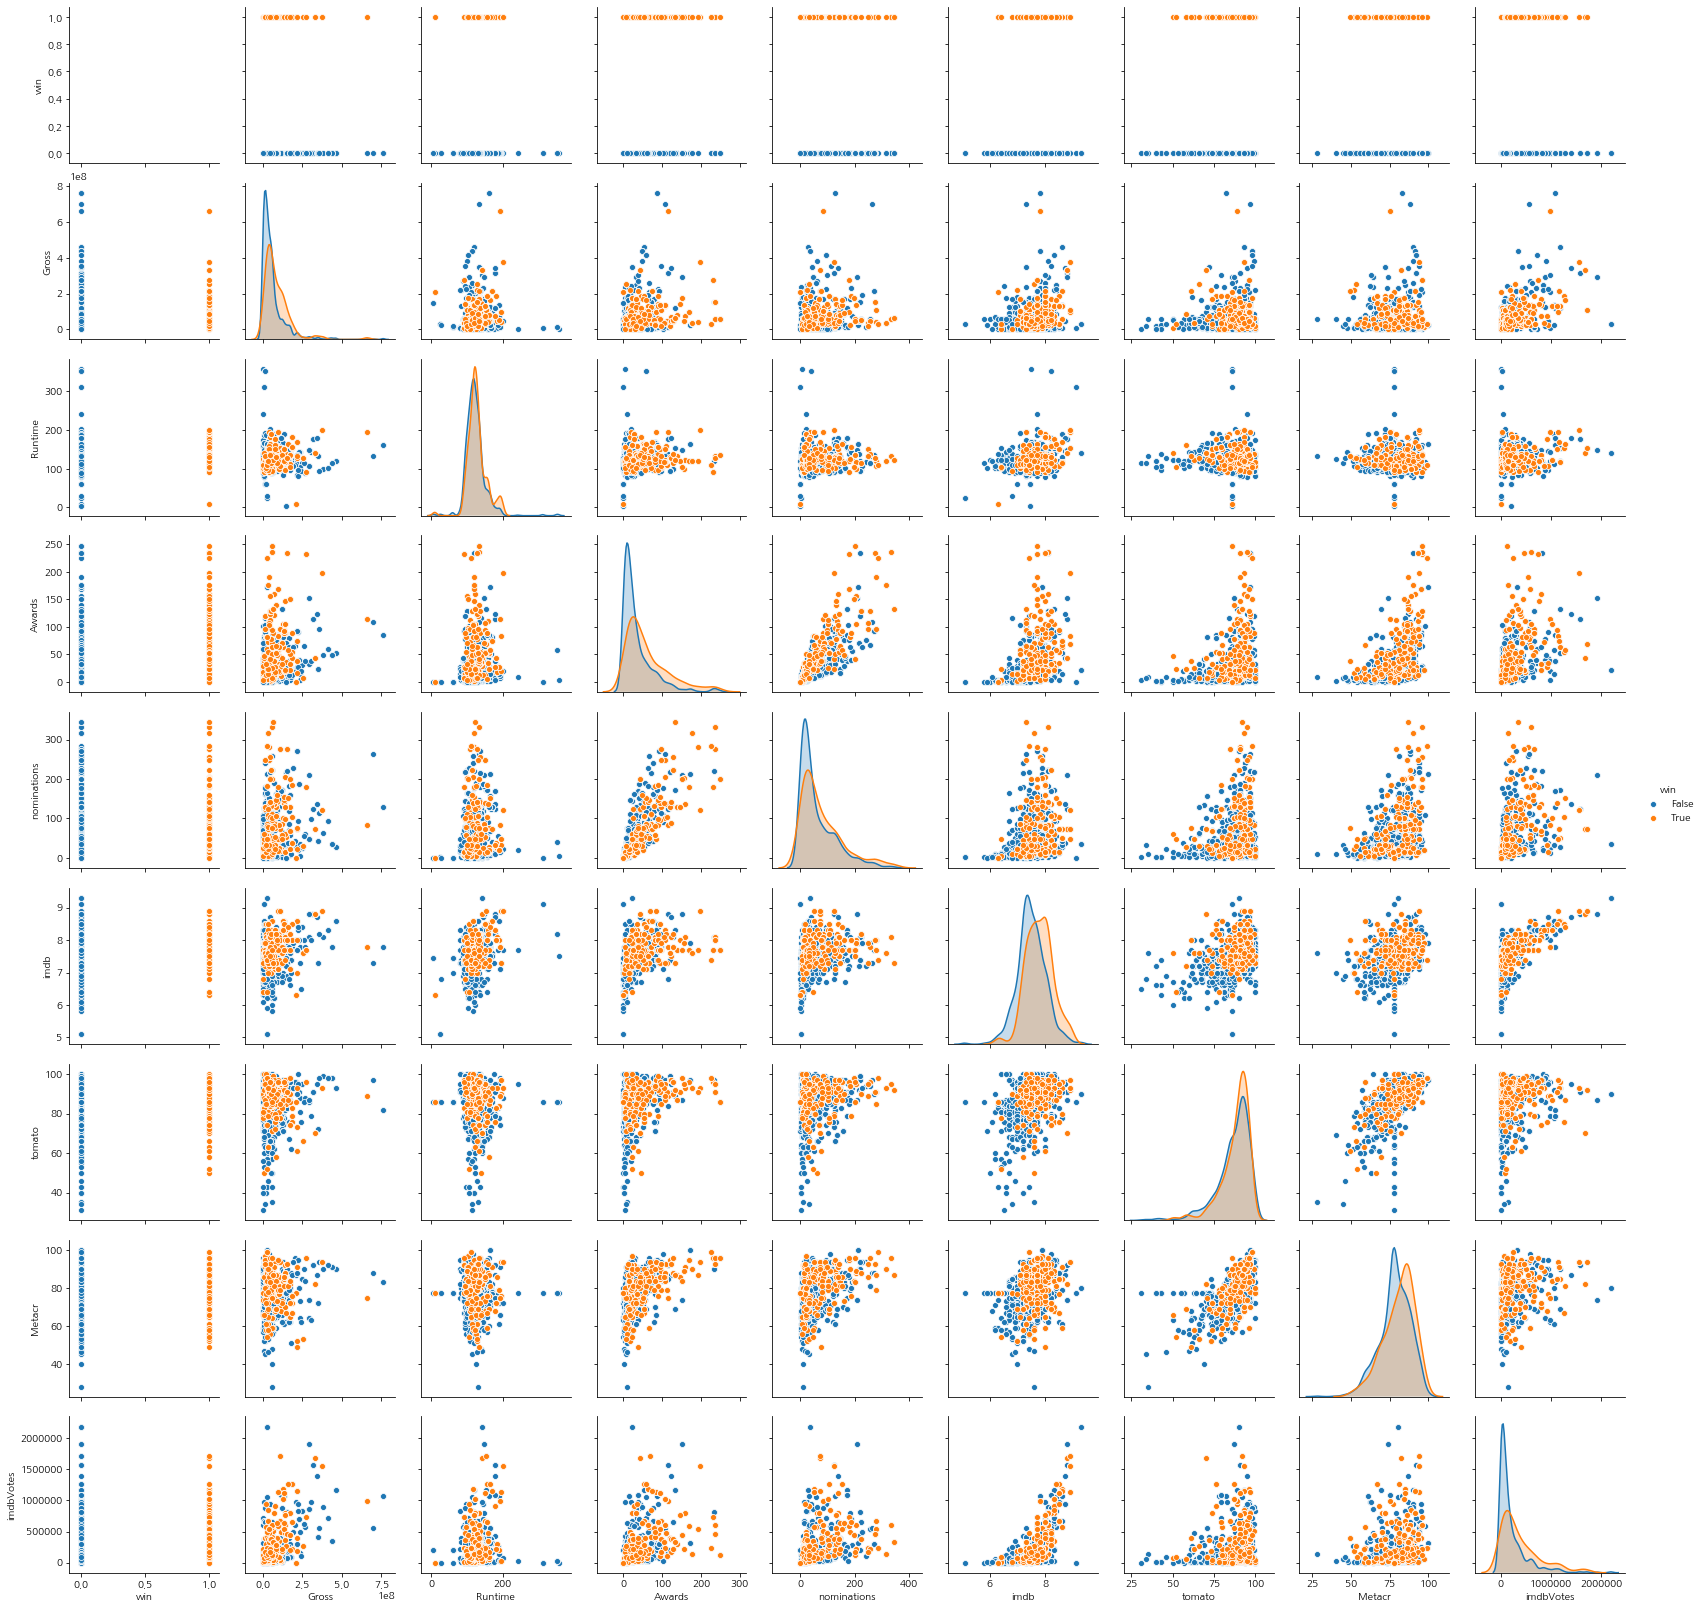

In [83]:
sns.pairplot(final.iloc[:,6:16], hue="win", height=2.5);

* 5개 부문 전체로 feature간의 상관관계를 보기위한 scatter를 수상 여부에 따라 색을 변경하여 pairplot이다.
* 특별하게 수상 여부를 결정하는 feature는 없는 것으로 보인다.
* imdb-imdbVotes 는 양의 상관관계가 있다. 
* nominations - Awards 는 양의 상관관계가 있다. 
* 그 외에 feature들은 상관관계를 보이고 있지 않다. 